In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

1. Treino
2. Validação
3. TESTE

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)


In [8]:
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0

train['Sex_binario'] = train['Sex'].map(transformar_sexo)



In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [10]:
train['Sex'].value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [11]:
variaveis = ['Sex_binario', 'Age','Pclass', 'SibSp', 'Parch','Fare']

In [12]:
x = train[variaveis]
y = train['Survived']

In [13]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [14]:
x = x.fillna(-1)

In [15]:
modelo.fit(x, y)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [16]:
test['Sex_binario'] = test['Sex'].map(transformar_sexo)
X_prev = test[variaveis]

In [17]:
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

In [18]:
X_prev = test[variaveis]
X_prev = X_prev.fillna(-1)
X_prev.head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,34.5,3,0,0,7.8292
1,1,47.0,3,1,0,7.0000
2,0,62.0,2,0,0,9.6875
3,0,27.0,3,0,0,8.6625
4,1,22.0,3,1,1,12.2875


In [19]:
p = modelo.predict(X_prev)

In [20]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [23]:
sub = pd.Series(p, index= test['PassengerId'], name='Survived')

In [24]:
sub.shape

(418,)

In [25]:
sub.to_csv("primeiro.csv", header=True)

In [26]:
p

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [27]:
np.random.seed(0)
X_treino, X_valid, y_treino, y_valid = train_test_split(x, y, test_size=0.5)

In [28]:
X_treino.head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
213,0,30.0,2,0,0,13.0000
586,0,47.0,2,0,0,15.0000
499,0,24.0,3,0,0,7.7958
821,0,27.0,3,0,0,8.6625
246,1,25.0,3,0,0,7.7750


In [29]:
X_treino.shape, X_valid.shape, y_treino.shape, y_valid.shape 

((445, 6), (446, 6), (445,), (446,))

In [30]:
x_treino = X_treino.fillna(-1)
y_treino = y_treino.fillna(-1)
X_valid = X_valid.fillna(-1)
y_valid = y_valid.fillna(-1)

In [31]:
modelo.fit(x_treino, y_treino)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [32]:
 P = modelo.predict(X_valid)

In [33]:
np.mean(y_valid == P)

0.7802690582959642

In [34]:
p = (X_valid['Sex_binario'] == 2).astype(np.int64)
np.mean(y_valid ==  p)

0.6345291479820628

In [35]:
from sklearn.model_selection import KFold

In [36]:
x_falso = np.array([0,1,2,3,4,5,6,7,8,9])

In [40]:
x_falso

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
?KFold

In [42]:

kf= KFold(3, shuffle=True, random_state=0)
for linhas_treino, Linhas_valid in kf.split(x_falso):
    print('treino:', linhas_treino)
    print('valid:', Linhas_valid)
    print("-----"*10)

treino: [0 1 3 5 6 7]
valid: [2 4 8 9]
--------------------------------------------------
treino: [0 2 3 4 5 8 9]
valid: [1 6 7]
--------------------------------------------------
treino: [1 2 4 6 7 8 9]
valid: [0 3 5]
--------------------------------------------------


In [37]:
resultados = []
for rep in range(10):
    kf= KFold(3, shuffle=True, random_state=0)
    resultados = []
    for linhas_treino, Linhas_valid in kf.split(x):
        print('treino:', linhas_treino.shape)
        print('valid:', Linhas_valid.shape)


        x_treino,x_valid = x.iloc[linhas_treino], x.iloc[ Linhas_valid]
        y_treino, y_valid = y.iloc[linhas_treino], y.iloc[ Linhas_valid]
       # print(x_treino.head())
        #print("-----"*10)


        modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
        modelo.fit(x_treino,y_treino)
        p = modelo.predict(x_valid)    
        acc = np.mean(y_valid == p)  
        resultados.append(acc)
        print('acc:',acc)
        print("-----"*10)


treino: (594,)
valid: (297,)
acc: 0.8215488215488216
--------------------------------------------------
treino: (594,)
valid: (297,)
acc: 0.8282828282828283
--------------------------------------------------
treino: (594,)
valid: (297,)
acc: 0.8114478114478114
--------------------------------------------------
treino: (594,)
valid: (297,)
acc: 0.8215488215488216
--------------------------------------------------
treino: (594,)
valid: (297,)
acc: 0.8282828282828283
--------------------------------------------------
treino: (594,)
valid: (297,)
acc: 0.8114478114478114
--------------------------------------------------
treino: (594,)
valid: (297,)
acc: 0.8215488215488216
--------------------------------------------------
treino: (594,)
valid: (297,)
acc: 0.8282828282828283
--------------------------------------------------
treino: (594,)
valid: (297,)
acc: 0.8114478114478114
--------------------------------------------------
treino: (594,)
valid: (297,)
acc: 0.8215488215488216
-----------

In [38]:
np.mean(resultados)

0.8204264870931537

In [39]:
from sklearn.model_selection import RepeatedKFold


In [78]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
for linhas_treino, Linhas_valid in kf.split(x):
    print('treino:', linhas_treino.shape)
    print('valid:', Linhas_valid.shape)


    x_treino,x_valid = x.iloc[linhas_treino], x.iloc[ Linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[ Linhas_valid]
   # print(x_treino.head())
    #print("-----"*10)


    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(x_treino,y_treino)
    p = modelo.predict(x_valid)    
    acc = np.mean(y_valid == p)  
    resultados.append(acc)
    print('acc:',acc)
    print("-----"*10)


treino: (445,)
valid: (446,)
acc: 0.7623318385650224
--------------------------------------------------
treino: (446,)
valid: (445,)
acc: 0.7932584269662921
--------------------------------------------------
treino: (445,)
valid: (446,)
acc: 0.8116591928251121
--------------------------------------------------
treino: (446,)
valid: (445,)
acc: 0.7910112359550562
--------------------------------------------------
treino: (445,)
valid: (446,)
acc: 0.7937219730941704
--------------------------------------------------
treino: (446,)
valid: (445,)
acc: 0.7797752808988764
--------------------------------------------------
treino: (445,)
valid: (446,)
acc: 0.8071748878923767
--------------------------------------------------
treino: (446,)
valid: (445,)
acc: 0.7887640449438202
--------------------------------------------------
treino: (445,)
valid: (446,)
acc: 0.8139013452914798
--------------------------------------------------
treino: (446,)
valid: (445,)
acc: 0.802247191011236
------------

#erros de validaçao

In [79]:
x_valid_check = train.iloc[Linhas_valid].copy()
x_valid_check['previsao'] = p
x_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_S,Embarked_C,Embarked_Q,Cabin_nulo,Nome_contem_Miss,Nome_contem_Mr,Nome_contem_Major,Nome_contem_Mrs,Nome_contem_Col,previsao
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,0,1,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,1,0,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,1,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,0,0,1,0,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,0,1,0,1,0,0,0,0


In [80]:
x_valid_check.shape

(445, 23)

In [81]:

erros = x_valid_check[x_valid_check['Survived'] != x_valid_check['previsao'] ]

In [82]:
erros = erros[['PassengerId', 'Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived','previsao']]

In [83]:
erros

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,previsao
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,1,0
22,23,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,1,0
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,1,0
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,853,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,0,1
854,855,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S,0,1
869,870,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,0,1


In [84]:
mulheres = erros[erros['Sex'] == 'female']

In [85]:
homens = erros[erros['Sex'] == 'male']
porto_embarque_s = erros[erros['Embarked'] == 'S']
porto_embarque_q = erros[erros['Embarked'] == 'Q']
porto_embarque_c = erros[erros['Embarked'] == 'C']

In [86]:
mulheres.sort_values('Survived')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,previsao
415,416,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S,0,1
854,855,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S,0,1
852,853,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,0,1
772,773,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S,0,1
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S,0,1
654,655,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q,0,1
593,594,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q,0,1
502,503,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q,0,1
501,502,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q,0,1
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,0,1


In [87]:
homens.sort_values('Survived')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,previsao
452,453,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C,0,1
442,443,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.7750,NaN,S,0,1
238,239,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5000,NaN,S,0,1
745,746,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,0,1
169,170,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,0,1
757,758,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,29108,11.5000,NaN,S,0,1
698,699,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C,0,1
139,140,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C,0,1
144,145,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.5000,NaN,S,0,1
544,545,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C86,C,0,1


In [56]:
porto_embarque_s.shape,porto_embarque_q.shape, porto_embarque_c.shape

((60, 13), (6, 13), (18, 13))

In [88]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)
train['Cabin_nulo'] = train['Cabin'].isnull().astype(int)
train['Nome_contem_Miss'] = train['Name'].str.contains( 'Miss').astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains( 'Mr').astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains( 'Major').astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains( 'Mrs').astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains( 'Col').astype(int)



In [89]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Cabin_nulo', 'Nome_contem_Miss', 'Nome_contem_Mr',  'Nome_contem_Major', 'Nome_contem_Mrs', 'Nome_contem_Col']

In [90]:
x = train[variaveis].fillna(-1)
y = train['Survived']

In [91]:
from sklearn.linear_model import LogisticRegression

#modelo_Anterior = 0.7620650953984288

In [92]:
resultados3 = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
for linhas_treino, Linhas_valid in kf.split(x):
    print('treino:', linhas_treino.shape)
    print('valid:', Linhas_valid.shape)


    x_treino,x_valid = x.iloc[linhas_treino], x.iloc[ Linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[ Linhas_valid]
   # print(x_treino.head())
    #print("-----"*10)
    modelo = LogisticRegression()

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(x_treino,y_treino)
    p = modelo.predict(x_valid)    
    acc = np.mean(y_valid == p)  
    resultados3.append(acc)
    print('acc:',acc)
    print("-----"*10)


treino: (445,)
valid: (446,)
acc: 0.7623318385650224
--------------------------------------------------
treino: (446,)
valid: (445,)
acc: 0.7932584269662921
--------------------------------------------------
treino: (445,)
valid: (446,)
acc: 0.8116591928251121
--------------------------------------------------
treino: (446,)
valid: (445,)
acc: 0.7910112359550562
--------------------------------------------------
treino: (445,)
valid: (446,)
acc: 0.7937219730941704
--------------------------------------------------
treino: (446,)
valid: (445,)
acc: 0.7797752808988764
--------------------------------------------------
treino: (445,)
valid: (446,)
acc: 0.8071748878923767
--------------------------------------------------
treino: (446,)
valid: (445,)
acc: 0.7887640449438202
--------------------------------------------------
treino: (445,)
valid: (446,)
acc: 0.8139013452914798
--------------------------------------------------
treino: (446,)
valid: (445,)
acc: 0.802247191011236
------------

In [93]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


((array([1., 0., 2., 1., 3., 4., 2., 4., 0., 3.]),
  array([0.76233184, 0.7690583 , 0.77578475, 0.78251121, 0.78923767,
         0.79596413, 0.80269058, 0.80941704, 0.8161435 , 0.82286996,
         0.82959641]),
  <BarContainer object of 10 artists>),
 (array([1., 0., 2., 1., 3., 4., 2., 4., 0., 3.]),
  array([0.76233184, 0.7690583 , 0.77578475, 0.78251121, 0.78923767,
         0.79596413, 0.80269058, 0.80941704, 0.8161435 , 0.82286996,
         0.82959641]),
  <BarContainer object of 10 artists>))

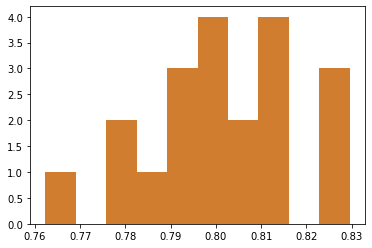

In [94]:
pylab.hist(resultados3),pylab.hist(resultados,alpha = 0.8)


In [96]:
np.mean(resultados3)

0.801682370131506

In [100]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)
train['Cabin_nulo'] = train['Cabin'].isnull().astype(int)
train['Nome_contem_Miss'] = train['Name'].str.contains( 'Miss').astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains( 'Mr').astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains( 'Major').astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains( 'Mrs').astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains( 'Col').astype(int)
modelo = LogisticRegression()
modelo.fit(x , y)
p = modelo.predict(test[variaveis]).fillna(-1)


C:\Users\Marcos\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TypeError: 'PytestTester' object is not subscriptable